# MetPy を用いてゾンデ観測データを可視化する

29 Dec. 2020

2020年12月29日の朝、つくば市では霧が発生していました。この時のつくば市での気象状況を見るため、高層気象データからエマグラム (Skew-T/log-p) 図を作成してみることにします。

可視化には最近 v1.0 がリリースされた [MetPy](https://unidata.github.io/MetPy) を使ってみます。 下記コードは、ほとんどサンプルデータそのままです。

Ref: https://unidata.github.io/python-gallery/examples/SkewT_Example.html

まずは必要なモジュールのインストール。

In [ ]:
!pip install metpy siphon

In [ ]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from metpy.plots import SkewT, add_metpy_logo
from metpy.units import pandas_dataframe_to_unit_arrays, units
from siphon.simplewebservice.wyoming import WyomingUpperAir

Cannot import USCOUNTIES and USSTATES without Cartopy installed.


つくば市ということで、「館野」の高層気象観測データを取得します。[気象庁のページ](http://www.data.jma.go.jp/obd/stats/etrn/upper/index.php) からも取得できますが、ここでは楽に取得できる[ワイオミング大学の気象データ](http://weather.uwyo.edu/upperair/sounding.html)を用いています。館野の ID は 47646 です。

In [ ]:
d = dt.datetime(2020, 12, 29, 0)
station = { 'id': '47646', 'name': 'Tateno' }   # Tateno

# Read remote sounding data based on time (d) and station
df = WyomingUpperAir.request_data(d, station['id'])
df.head()

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation
0,1020.0,31,1.0,1.0,260,3,2.954423,0.520945,,47646,2020-12-29,36.05,140.13,31.0
1,1018.0,46,0.8,0.8,260,3,2.954423,0.520945,,47646,2020-12-29,36.05,140.13,31.0
2,1005.0,145,4.0,1.1,260,7,6.893654,1.215537,,47646,2020-12-29,36.05,140.13,31.0
3,1000.0,183,4.6,1.2,260,8,7.878462,1.389185,,47646,2020-12-29,36.05,140.13,31.0
4,976.0,382,6.5,-0.5,260,10,9.848078,1.736482,,47646,2020-12-29,36.05,140.13,31.0


データは読み込めているので、MetPy を用いて Skew-T 図を作成します。

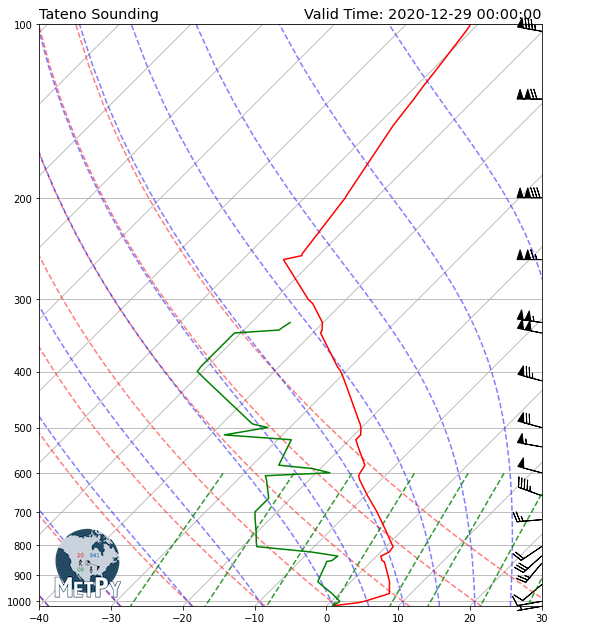

In [ ]:
p = df['pressure']
T = df['temperature']
Td = df['dewpoint']
u = df['u_wind']
v = df['v_wind']

fig = plt.figure(figsize=(9, 11))

# Initiate the skew-T plot type from MetPy class loaded earlier
skew = SkewT(fig, rotation=45)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p[::3], u[::3], v[::3], y_clip_radius=0.03)

# Set some appropriate axes limits for x and y
skew.ax.set_xlim(-40, 30)
skew.ax.set_ylim(1020, 100)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

# Add some descriptive titles
plt.title(f'{station["name"]} Sounding', loc='left', fontsize='x-large')
plt.title('Valid Time: {}'.format(d), loc='right', fontsize='x-large')

# Add the MetPy logo!
fig = plt.gcf()
add_metpy_logo(fig, 50, 30)

あら簡単。

接地境界層付近で湿度が高く、逆転層ができていることがわかります。